In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import numpy as np
from pprint import pprint as pp

In [29]:
import warnings
warnings.filterwarnings('ignore')

In [30]:
dataset = pd.read_csv('/Users/jasonjoelpinto/Downloads/Melbourne_housing_FULL.csv')

In [31]:
dataset

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


In [32]:
dataset.nunique()

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

In [33]:
dataset.shape

(34857, 21)

In [34]:
cols_to_use = ['Suburb','Rooms','Type','SellerG','Regionname','Propertycount','Distance','CouncilArea','Bedroom2','Bathroom', 'Car','Landsize','BuildingArea','Price']

In [35]:
dataset = dataset[cols_to_use]

In [36]:
dataset

,Suburb,Rooms,Type,SellerG,Regionname,Propertycount,Distance,CouncilArea,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price
0,Abbotsford,2,h,Jellis,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,1.0,126.0,NaN,NaN
1,Abbotsford,2,h,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,1.0,202.0,NaN,1480000.0
2,Abbotsford,2,h,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,0.0,156.0,79.0,1035000.0
3,Abbotsford,3,u,Rounds,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,2.0,1.0,0.0,NaN,NaN
4,Abbotsford,3,h,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,2.0,0.0,134.0,150.0,1465000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,4,h,Jas,Western Metropolitan,6543.0,6.3,Maribyrnong City Council,4.0,1.0,3.0,593.0,NaN,1480000.0
34853,Yarraville,2,h,Sweeney,Western Metropolitan,6543.0,6.3,Maribyrnong City Council,2.0,2.0,1.0,98.0,104.0,888000.0
34854,Yarraville,2,t,Jas,Western Metropolitan,6543.0,6.3,Maribyrnong City Council,2.0,1.0,2.0,220.0,120.0,705000.0
34855,Yarraville,3,h,hockingstuart,Western Metropolitan,6543.0,6.3,Maribyrnong City Council,NaN,NaN,NaN,NaN,NaN,1140000.0


In [37]:
dataset['Suburb']

0        Abbotsford
1        Abbotsford
2        Abbotsford
3        Abbotsford
4        Abbotsford
            ...    
34852    Yarraville
34853    Yarraville
34854    Yarraville
34855    Yarraville
34856    Yarraville
Name: Suburb, Length: 34857, dtype: object

In [38]:
dataset.head()

,Suburb,Rooms,Type,SellerG,Regionname,Propertycount,Distance,CouncilArea,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price
0,Abbotsford,2,h,Jellis,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,1.0,126.0,NaN,NaN
1,Abbotsford,2,h,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,1.0,202.0,NaN,1480000.0
2,Abbotsford,2,h,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,0.0,156.0,79.0,1035000.0
3,Abbotsford,3,u,Rounds,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,2.0,1.0,0.0,NaN,NaN
4,Abbotsford,3,h,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,2.0,0.0,134.0,150.0,1465000.0


In [39]:
pp("Jason")

'Jason'


In [40]:
dataset.isna().sum()

Suburb               0
Rooms                0
Type                 0
SellerG              0
Regionname           3
Propertycount        3
Distance             1
CouncilArea          3
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
Price             7610
dtype: int64

In [41]:
cols_to_fill_zero = ['Propertycount','Distance','Bedroom2','Bathroom','Car']
dataset[cols_to_fill_zero] = dataset[cols_to_fill_zero].fillna(0)

In [42]:
dataset.isna().sum()

Suburb               0
Rooms                0
Type                 0
SellerG              0
Regionname           3
Propertycount        0
Distance             0
CouncilArea          3
Bedroom2             0
Bathroom             0
Car                  0
Landsize         11810
BuildingArea     21115
Price             7610
dtype: int64

In [43]:
dataset['Landsize'] = dataset['Landsize'].fillna(dataset.Landsize.mean())
dataset['BuildingArea'] = dataset['BuildingArea'].fillna(dataset.BuildingArea.mean())

In [44]:
dataset

,Suburb,Rooms,Type,SellerG,Regionname,Propertycount,Distance,CouncilArea,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price
0,Abbotsford,2,h,Jellis,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,1.0,126.000000,160.2564,NaN
1,Abbotsford,2,h,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,1.0,202.000000,160.2564,1480000.0
2,Abbotsford,2,h,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,0.0,156.000000,79.0000,1035000.0
3,Abbotsford,3,u,Rounds,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,2.0,1.0,0.000000,160.2564,NaN
4,Abbotsford,3,h,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,2.0,0.0,134.000000,150.0000,1465000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,4,h,Jas,Western Metropolitan,6543.0,6.3,Maribyrnong City Council,4.0,1.0,3.0,593.000000,160.2564,1480000.0
34853,Yarraville,2,h,Sweeney,Western Metropolitan,6543.0,6.3,Maribyrnong City Council,2.0,2.0,1.0,98.000000,104.0000,888000.0
34854,Yarraville,2,t,Jas,Western Metropolitan,6543.0,6.3,Maribyrnong City Council,2.0,1.0,2.0,220.000000,120.0000,705000.0
34855,Yarraville,3,h,hockingstuart,Western Metropolitan,6543.0,6.3,Maribyrnong City Council,0.0,0.0,0.0,593.598993,160.2564,1140000.0


In [45]:
dataset.isna().sum()

Suburb              0
Rooms               0
Type                0
SellerG             0
Regionname          3
Propertycount       0
Distance            0
CouncilArea         3
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
Price            7610
dtype: int64

In [46]:
dataset.dropna(inplace=True)
dataset.isna().sum()

Suburb           0
Rooms            0
Type             0
SellerG          0
Regionname       0
Propertycount    0
Distance         0
CouncilArea      0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
Price            0
dtype: int64

In [47]:
dataset = pd.get_dummies(dataset,drop_first=True)
dataset.head()

,Rooms,Propertycount,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price,Suburb_Aberfeldie,...,CouncilArea_Moorabool Shire Council,CouncilArea_Moreland City Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council
1,2,4019.0,2.5,2.0,1.0,1.0,202.0,160.2564,1480000.0,False,...,False,False,False,False,False,False,False,False,True,False
2,2,4019.0,2.5,2.0,1.0,0.0,156.0,79.0000,1035000.0,False,...,False,False,False,False,False,False,False,False,True,False
4,3,4019.0,2.5,3.0,2.0,0.0,134.0,150.0000,1465000.0,False,...,False,False,False,False,False,False,False,False,True,False
5,3,4019.0,2.5,3.0,2.0,1.0,94.0,160.2564,850000.0,False,...,False,False,False,False,False,False,False,False,True,False
6,4,4019.0,2.5,3.0,1.0,2.0,120.0,142.0000,1600000.0,False,...,False,False,False,False,False,False,False,False,True,False


In [48]:
X = dataset.drop('Price',axis=1)
y = dataset['Price']

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=2, test_size=0.3)

In [50]:
from sklearn.linear_model import LinearRegression
lrig = LinearRegression()
lrig.fit(X_train, y_train)

LinearRegression()

In [51]:
lrig.score(X_test,y_test)

0.13402430522028075

In [52]:
lrig.score(X_train,y_train)

0.6811173231963086

In [55]:
from sklearn.linear_model import Lasso
ls_rig = Lasso(alpha=50, max_iter=100, )
ls_rig.fit(X_train, y_train)
pp(ls_rig.score(X_test,y_test))
pp(ls_rig.score(X_train,y_train))

0.15246753776552513
0.6810987320535615


In [56]:
from sklearn.linear_model import Ridge
rg_rig = Lasso()
rg_rig.fit(X_train, y_train)
pp(rg_rig.score(X_test,y_test))
pp(rg_rig.score(X_train,y_train))


0.15246753776552513
0.6810987320535615


In [57]:
dataset.iloc[1:3]

,Rooms,Propertycount,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price,Suburb_Aberfeldie,...,CouncilArea_Moorabool Shire Council,CouncilArea_Moreland City Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council
2,2,4019.0,2.5,2.0,1.0,0.0,156.0,79.0,1035000.0,False,...,False,False,False,False,False,False,False,False,True,False
4,3,4019.0,2.5,3.0,2.0,0.0,134.0,150.0,1465000.0,False,...,False,False,False,False,False,False,False,False,True,False


In [66]:
dataset.iloc[:,3]

1        2.0
2        2.0
4        3.0
5        3.0
6        3.0
        ... 
34852    4.0
34853    2.0
34854    2.0
34855    0.0
34856    2.0
Name: Bedroom2, Length: 27244, dtype: float64

In [59]:
dataset.head()

,Rooms,Propertycount,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price,Suburb_Aberfeldie,...,CouncilArea_Moorabool Shire Council,CouncilArea_Moreland City Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council
1,2,4019.0,2.5,2.0,1.0,1.0,202.0,160.2564,1480000.0,False,...,False,False,False,False,False,False,False,False,True,False
2,2,4019.0,2.5,2.0,1.0,0.0,156.0,79.0000,1035000.0,False,...,False,False,False,False,False,False,False,False,True,False
4,3,4019.0,2.5,3.0,2.0,0.0,134.0,150.0000,1465000.0,False,...,False,False,False,False,False,False,False,False,True,False
5,3,4019.0,2.5,3.0,2.0,1.0,94.0,160.2564,850000.0,False,...,False,False,False,False,False,False,False,False,True,False
6,4,4019.0,2.5,3.0,1.0,2.0,120.0,142.0000,1600000.0,False,...,False,False,False,False,False,False,False,False,True,False


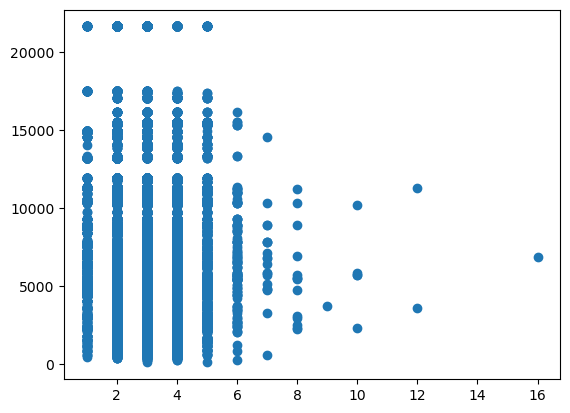

In [68]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(dataset.iloc[:,0],dataset.iloc[:,1])

In [76]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(contamination=0.2)
clf.fit(dataset[['Rooms','Car']])
predictions = clf.predict(dataset[['Rooms','Car']])

In [78]:
pp(predictions)

array([1, 1, 1, ..., 1, 1, 1])


In [79]:
import numpy as np
abn_ind = np.where(predictions<0)
abn_ind

(array([   10,    14,    19, ..., 27226, 27233, 27239]),)

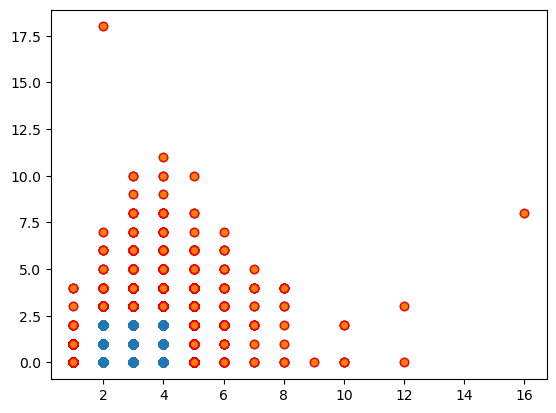

In [84]:
x = dataset[['Rooms','Car']].values
index = np.where(predictions<0)
plt.scatter(dataset['Rooms'], dataset['Car'])
plt.scatter(x[index,0], x[abn_ind,1], edgecolors='r')